# CSCI 4155 - Machine Learning: Assignment 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as ran

## Question 1
_Q: Implement a multi-layer perceptron (MLP) by modifying the MLP program from the class to solve the XOR problem and train it to translate the digital letters given in file pattern1 into the corresponding ASCII representation. In the file, each letter of the alphabet is represented by a matrix of 12x13 binary values so that each consecutive 12 rows represent one letter. Plot a training curve and interpret your results._

A: The compare() function compares the prediction made by the MLP to the expected results. It outputs 1.0 (100%) most of the time, suggesting that the MLP has learned the given pattern somewhat accurately, and only ocassionally mis-predict a character.

#### Define functions to obtain input and output

In [2]:
def get_pattern():
    p1 = np.loadtxt('pattern1.txt')
    pattern = []

    p, l = 0, 0
    while p < len(p1):
        letter = []
        while p < (l + 1) * 12:
            for pp in p1[p]:
                letter.append(pp)
            p += 1
        pattern.append(letter)
        l += 1

    pattern = np.array(pattern)
    return np.array(pattern)

def get_ascii():
    letters = []

    for i in np.arange(65, 65 + 26):
        al = bin(i)
        letter = []
        for a in al:
            if a.isdigit():
                letter.append(float(a))
        letters.append(np.array(letter))

    return np.array(letters)

def get_alphabets():
    al = []
    for i in np.arange(65, 65 + 26):
        al.append(chr(i))
    return np.array(al)

#### Functions to train, predict, compare, and plot the results

In [3]:
def train(X):
    error = np.array([])

    wh = np.random.randn(Nh, Ni)    # weights of hidden nodes
    wo = np.random.randn(No, Nh)    # weights of output nodes
    dwh = np.zeros(wh.shape)        # delta weights of hidden nodes
    dwo = np.zeros(wo.shape)        # delta weights of ouput nodes
    
    # Train
    for trials in range(N):

        # the sigmoid gain functions
        h = 1 / (1 + np.exp(np.dot(-wh, X.T)))
        y = 1 / (1 + np.exp(np.dot(-wo, h)))

        do = y * (1 - y) * (Y.T - y)
        dh = h * (1 - h) * (np.dot(wo.T, do))

        # update weights with momentum
        dwo = 0.9 * dwo + np.dot(do, h.T)
        wo = wo + 0.1 * dwo
        dwh = 0.9 * dwh + np.dot(dh, X)
        wh = wh + 0.1 * dwh

        error = np.append(error, np.sum(abs(Y.T - y)))
        
    return error, wh, wo

def predict(wh, wo):
    h_test = 1 / (1 + np.exp(np.dot(-wh, X.T)))
    y_test = 1 / (1 + np.exp(np.dot(-wo, h_test)))

    y_test = y_test.T
    predictions = []
    for j in range(len(y_test)):
        v = 0
        for i in range(len(y_test[j])):
            if y_test[j][i] > thresh:
                y_test[j][i] = 1
                v += 2 ** (7 - i)
            else:
                y_test[j][i] = 0
        predictions.append(chr(v))

    return np.array(predictions)

def compare(y):
    error = 0
    for i in range(len(y_true)):
        if not y[i] == y_true[i]:
            error += 1
    return (26 - error) / 26
    
def plot(error):
    plt.plot(error)
    plt.title('Learning Curve')
    plt.xlabel('Number of iterations')
    plt.ylabel('Error')
    plt.show()

In [4]:
X = get_pattern()
Y = get_ascii()
y_true = get_alphabets()

Ni, Nh, No = 156, 24, 8
N = 10 ** 3
thresh = 10 ** -1

1.0


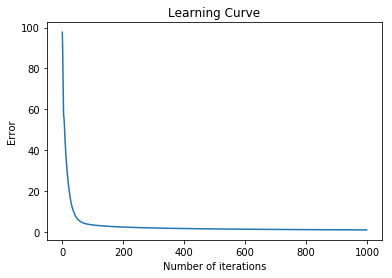

In [5]:
error_clean, wh_clean, wo_clean = train(X)
pred_clean = predict(wh_clean, wo_clean)
print(compare(pred_clean))
plot(error_clean)

## Question 2
_Q: Investigate how much noise the MLP can tolerate in the pattern before being unable to recognize a letter. Explain your implementation of noise and report your results._

A: I implemented noise by flipping a number of bits at random indices. I plot a graph of the relationship between the number of bits flipped and the accuracy (the percentage of correctly predicted characters). Ideally, I should train with the same amount of noise, and then average the error to get more accurate results, but that is computationally costly and would take too long to run for this assignment. The accuracy falls to about 50% when noise = 10 (10 bits flipped)

In [6]:
def add_noise(x):
    for i in range(len(x)):
        index = ran.randint(0, 155)
        x[i][index] = (x[i][index] + 1) % 2
        
def train_and_test(noise):
    x_noise = np.copy(X)

    for i in range(noise):
        add_noise(x_noise)

    error_noise, wh_noise, wo_noise = train(x_noise)
    pred_noise = predict(wh_noise, wo_noise)
    return (compare(pred_noise))

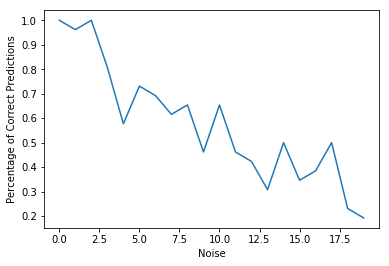

In [7]:
errors = []
noises = []
noise = 0
while noise < 20:
    error = 0
    error_clean, wh_clean, wo_clean = train(X)
    error = train_and_test(noise)
    errors.append(error)
    noises.append(noise)
    noise += 1

plt.plot(noises, errors)
plt.xlabel('Noise')
plt.ylabel('Percentage of Correct Predictions')
plt.show()

## Question 3
_Q: Which letter is represented in file pattern2?_

A: Should run the training and recognizing several times to see which character is recognized the most. I obtained 'O', 'K', 'I', etc.

In [8]:
p2 = np.loadtxt('pattern2.txt')

X = []
for p in p2:
    X = np.append(X, p)
X = np.array(X)

h = 1 / (1 + np.exp(np.dot(-wh_clean, X.T)))
Y = 1 / (1 + np.exp(np.dot(-wo_clean, h)))

v = 0
for i in range(len(Y)):
    if Y[i] > thresh:
        Y[i] = 1
        v += 2 ** (7 - i)
    else:
        Y[i] = 0

print(chr(v))

K
